In [1]:
%display latex

In [2]:
M = Manifold(4, 'M')
print(M)

4-dimensional differentiable manifold M


In [3]:
X.<t,r,th,ph> = M.chart(r't r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi')
X

Chart (M, (t, r, th, ph))

In [4]:
g = M.lorentzian_metric('g')
m = var('m') ; assume(m>=0)
g[0,0], g[1,1] = -(1-2*m/r), 1/(1-2*m/r)
g[2,2], g[3,3] = r^2, (r*sin(th))^2 
g.display()

g = (2*m - r)/r dt*dt - r/(2*m - r) dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

In [19]:
var('u')
outgeod = M.curve({X: [r + 2*m*ln(abs(r/(2*m)-1)) + u, r, pi/2, pi]}, (r, 0, +Infinity))
outgeod.display()

(0, +Infinity) --> M
   r |--> (t, r, th, ph) = (2*m*log(abs(1/2*r/m - 1)) + r + u, r, 1/2*pi, pi)

In [25]:
var('v')
ingeod = M.curve({X: [-r - 2*m*ln(abs(r/(2*m)-1)) + v, r, pi/2, pi]}, (r, 0, +Infinity))
ingeod.display()

(0, +Infinity) --> M
   r |--> (t, r, th, ph) = (-2*m*log(abs(1/2*r/m - 1)) - r + v, r, 1/2*pi, pi)

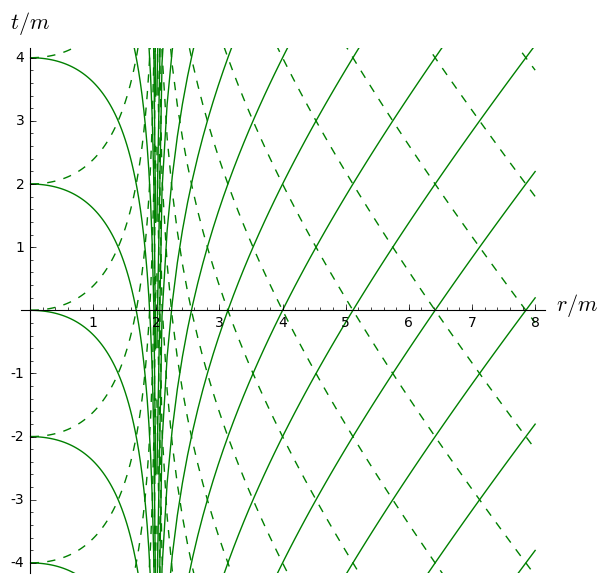

In [39]:
graph = Graphics()
for u0 in range(-20, 20, 2):
    graph += outgeod.plot(ambient_coords=(r,t), prange=(0.01, 1.99), parameters={m: 1, u: u0}, 
                          color='green', style='-', thickness=1, label_axes=False)
    graph += outgeod.plot(ambient_coords=(r,t), prange=(2.01, 8), parameters={m: 1, u: u0}, 
                          color='green', style='-', thickness=1, label_axes=False)
    graph += ingeod.plot(ambient_coords=(r,t), prange=(0.01, 1.99), parameters={m: 1, v: u0}, 
                          color='green', style='--', thickness=1, label_axes=False)
    graph += ingeod.plot(ambient_coords=(r,t), prange=(2.01, 8), parameters={m: 1, v: u0}, 
                          color='green', style='--', thickness=1, label_axes=False)
show(graph, axes_labels=[r"$r/m$", r"$t/m$"], aspect_ratio=1, ymin=-4, ymax=4)

In [40]:
graph.save("sch_rad_null_geod.pdf", aspect_ratio=1, ymin=-4, ymax=4)